# Objective

- We need to figure out what factors we are going to consider in order to predict the next cycles daily return. 

- Since we are using time series data, I worry that we may need to do different time windows in order to get data

- Given past data, we need to forecast the future covariance matrix and returns and then test this

- In order

- Factors Method to predict covariance matrix and returns, keeps track of the history of covariance matrices to attempt to build a stationary matrix and stationary returns vectors

- Markowitz takes in the predicted covariance matrix and returns, then it calculates the optimal portfolio with the minimum variance. May create a spectrum of different returns.

- We then take the new update

In [41]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import tools as T

def load_object(file_name):
    "load the pickled object"
    with open(file_name, 'rb') as f:
        return pickle.load(f)

def view_data(data_path):
    data = load_object(data_path)
    prices = data['prices']
    names = data['features']['names']
    features = data['features']['values']
    print(prices.shape)
    print(names)
    print(features.shape)
    return prices, features

class Strategy():
    def __init__(self):
        pass

    def handle_update(self, inx, price, factors):
        """Put your logic here
        Args:
            inx: zero-based inx in days
            price: [num_assets, ]
            factors: [num_assets, num_factors]
        Return:
            allocation: [num_assets, ]
        """
        assert price.shape[0] == factors.shape[0]
        return np.array([1.0] * price.shape[0])

# Loading Data

In [159]:
prices = load_object("C3_train.pkl")['prices']

In [3]:
features = load_object("C3_train.pkl")['features']

# Looking at the Prices

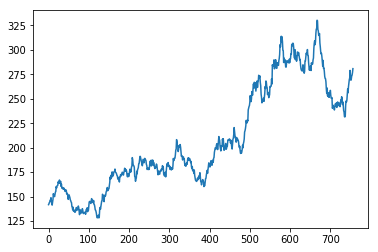

In [4]:
#looking at the first price
plt.plot(prices[:,0])

(array([ 59.,  58.,  76., 170.,  91.,  39.,  48.,  80., 106.,  30.]),
 array([4.85383416, 4.94839104, 5.04294791, 5.13750479, 5.23206166,
        5.32661853, 5.42117541, 5.51573228, 5.61028915, 5.70484603,
        5.7994029 ]),
 <a list of 10 Patch objects>)

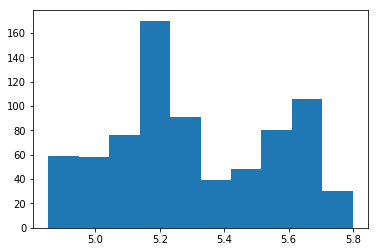

In [5]:
#Trying to see log normal distribution
plt.hist(np.log(prices[:,0]))

(array([  7.,  18., 131., 262., 234.,  78.,  22.,   3.,   0.,   1.]),
 array([-12.16923979,  -8.98359516,  -5.79795053,  -2.6123059 ,
          0.57333873,   3.75898337,   6.944628  ,  10.13027263,
         13.31591726,  16.50156189,  19.68720652]),
 <a list of 10 Patch objects>)

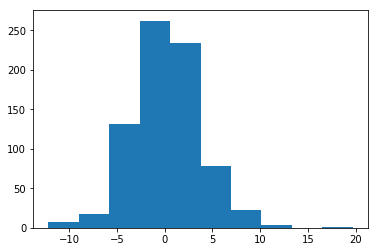

In [6]:
#Trying to see log normal distributions
plt.hist(prices[:,0][1:]-prices[:,0][:-1])

Daily return kinda seems stationary

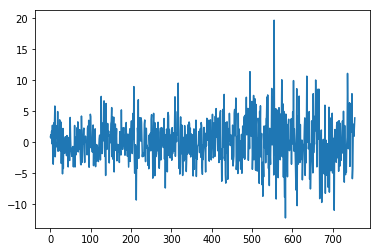

In [7]:
#Trying to see log normal distribution
plt.plot(prices[:,0][1:]-prices[:,0][:-1])

(array([  7.,  18., 131., 262., 234.,  78.,  22.,   3.,   0.,   1.]),
 array([-12.16923979,  -8.98359516,  -5.79795053,  -2.6123059 ,
          0.57333873,   3.75898337,   6.944628  ,  10.13027263,
         13.31591726,  16.50156189,  19.68720652]),
 <a list of 10 Patch objects>)

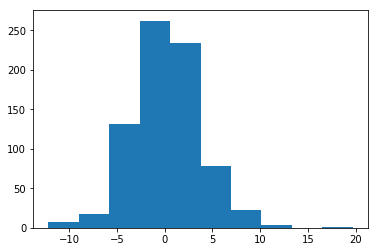

In [22]:
#Trying to see log normal distributions
plt.hist(prices[:,0][1:]-prices[:,0][:-1])

It appears like the daily returns look stationary

We are going to now transform these changing everything into a daily return matrix and removing the mean and dividing by the variance for normalization.

In [10]:
prices.shape

(757, 680)

In [27]:
daily_return = prices[1:,]-prices[:-1,:]

In [28]:
daily_return.shape

(756, 680)

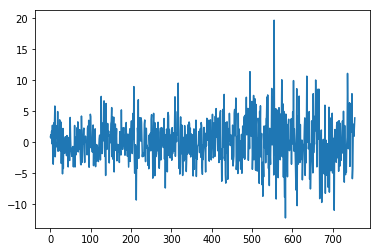

In [30]:
plt.plot(daily_return[:,0])

(array([ 10.,  46., 123., 219., 216.,  93.,  42.,   4.,   2.,   1.]),
 array([-1.70559912, -1.26741195, -0.82922477, -0.39103759,  0.04714959,
         0.48533676,  0.92352394,  1.36171112,  1.79989829,  2.23808547,
         2.67627265]),
 <a list of 10 Patch objects>)

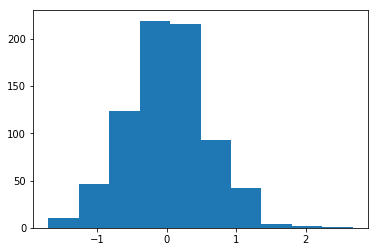

In [35]:
plt.hist(daily_return[:,3])

In [36]:
normalized_returns = daily_return/np.sqrt(np.var(daily_return,axis=0))

In [37]:
normalized_returns.shape

(756, 680)

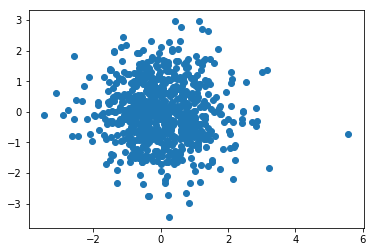

In [38]:
plt.scatter(normalized_returns[:,0],normalized_returns[:,10])

In [46]:
Es = []
Ps=[]
for i in range(1,680):
    p,E = T.OLS(normalized_returns[:,0],normalized_returns[:,i])
    Es.append(E)
    Ps.append(p[1])

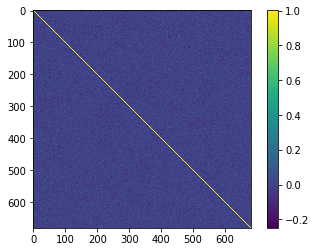

In [47]:
plt.imshow(np.cov(normalized_returns.T));plt.colorbar()

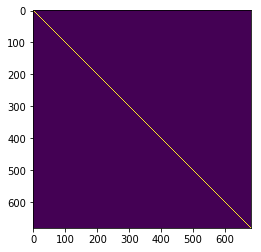

In [130]:
norm_returns_cov = np.cov(normalized_returns.T)
plt.imshow(abs(norm_returns_cov)>0.4)

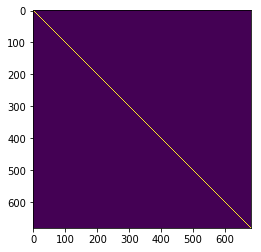

In [131]:
norm_returns_cov = np.cov(normalized_returns.T)
plt.imshow(norm_returns_cov>0.4)

In general, it seems like the stocks are very not correlated with each other

# Looking at the Features

- 'labour cost'
- 'analyst projected total earnings'
- 'weighted average outstanding shares'
- 'R&D intensity index',
- 'relative strength index',
- 'total assets',
- 'net book value' - Net book value is the amount at which an organization records an asset in its accounting records. Net book value is calculated as the original cost of an asset, minus any accumulated depreciation, accumulated depletion, accumulated amortization, and accumulated impairment (https://www.accountingtools.com/articles/2017/5/12/net-book-value)
- 'analyst sentiment' - 
- 'market share',
- 'Aggregate Capital Cost'- Capital costs are fixed, one-time expenses incurred on the purchase of land, buildings, construction, and equipment used in the production of goods or in the rendering of services. In other words, it is the total cost needed to bring a project to a commercially operable status. Whether a particular cost is capital or not depend on many factors such as accounting, tax laws, and materiality.

In [200]:
features['values'].shape

(756, 680, 10)

In [210]:
features_0 = features['values'][:,0,:]

In [202]:
returns_0 = (prices[:,0][1:]-prices[:,0][:-1])/prices[:,0][:-1]

In [211]:
features_0.shape

(756, 10)

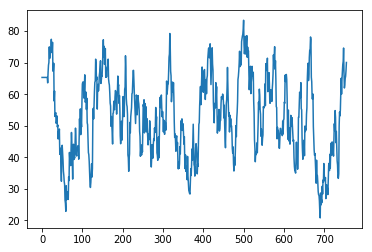

In [219]:
plt.plot(features_0[:,4])

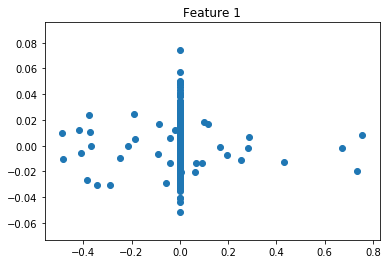

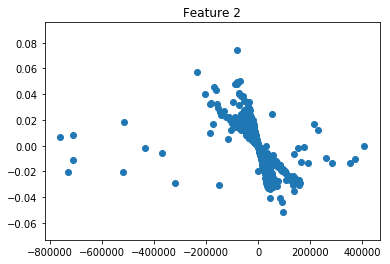

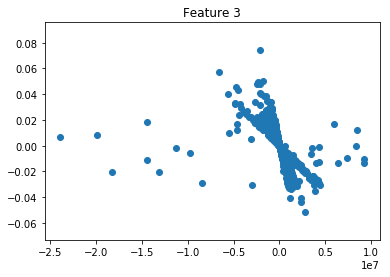

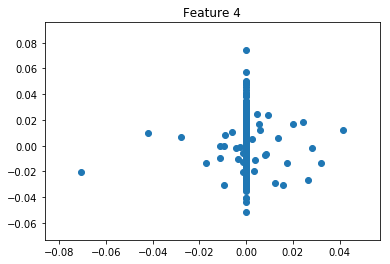

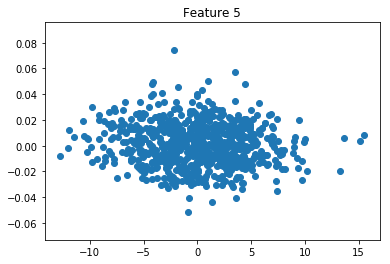

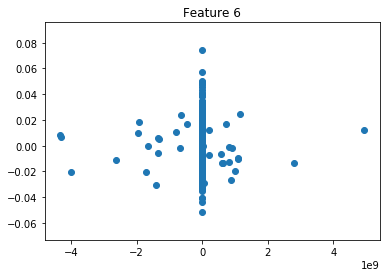

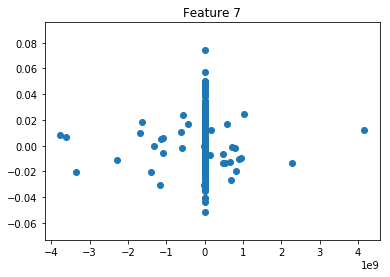

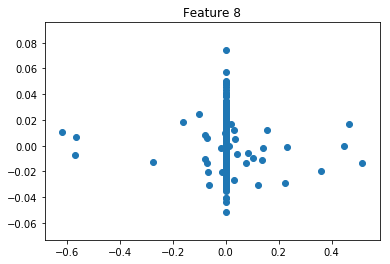

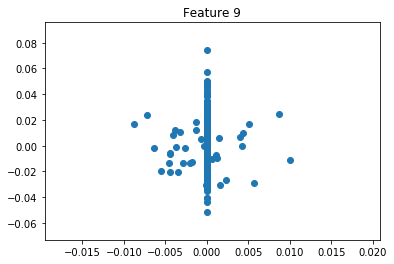

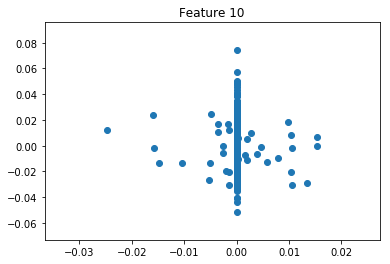

In [220]:
#We are going to display the normalized mean relationships
for i in range(10):
    plt.figure()
    plt.title("Feature {}".format(i+1))
    temp_features = features['values'][:,0,:][:,i]
    plt.scatter(temp_features[1:]-temp_features[:-1],returns_0[:-1])

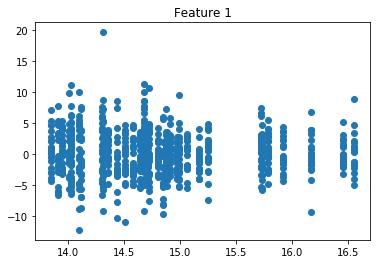

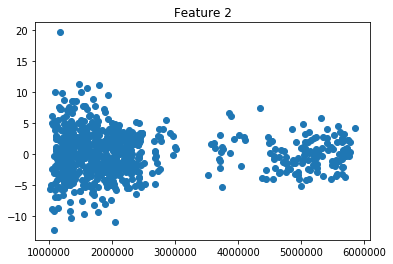

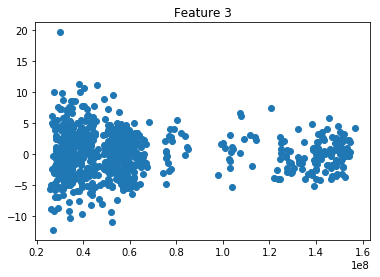

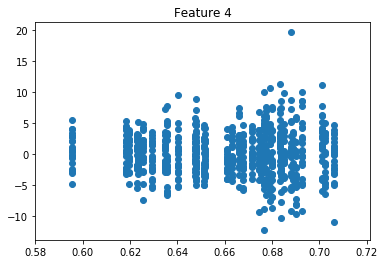

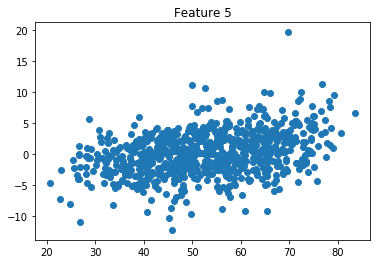

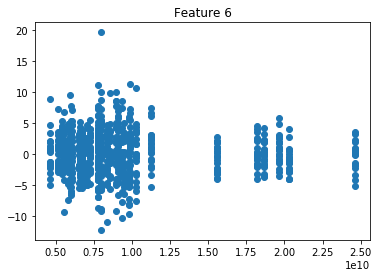

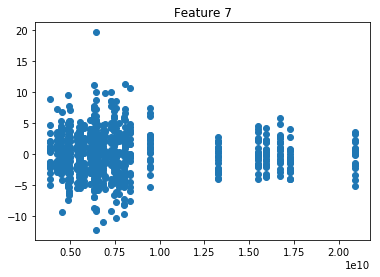

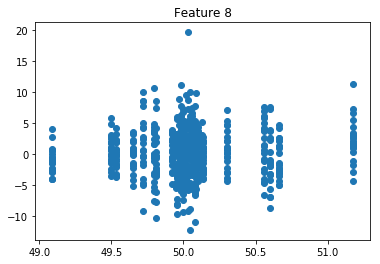

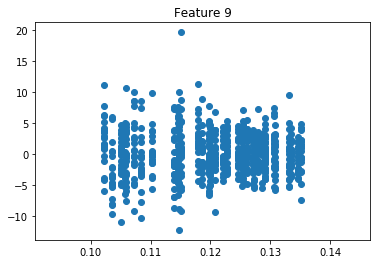

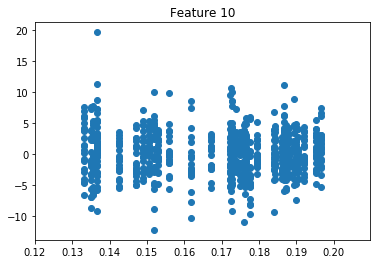

In [100]:
#We are going to display the normalized mean relationships
for i in range(10):
    plt.figure()
    plt.title("Feature {}".format(i+1))
    temp_features = features['values'][:,0,:][:,i]
    plt.scatter(temp_features,returns_0)

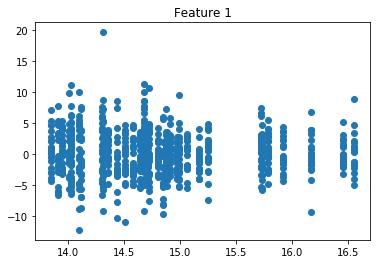

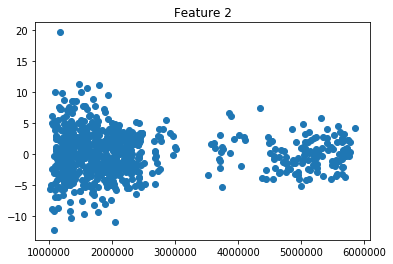

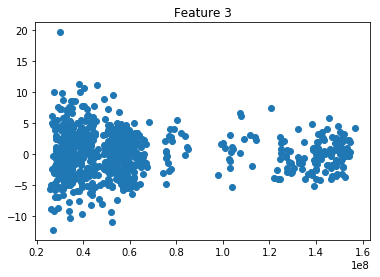

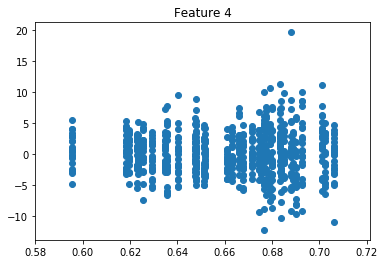

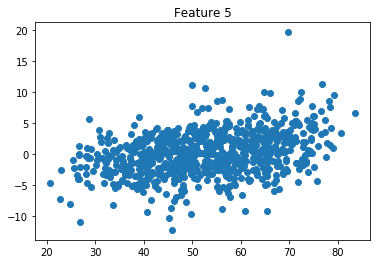

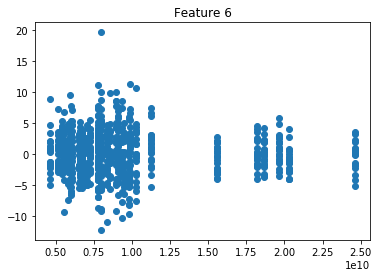

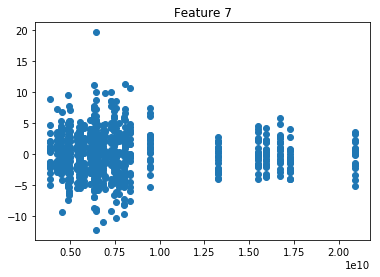

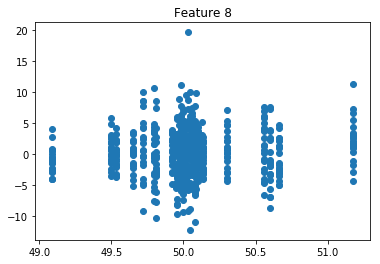

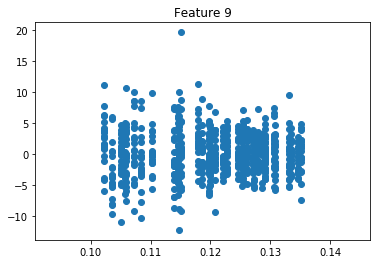

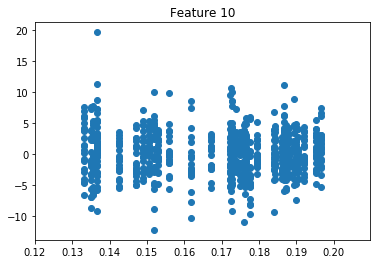

In [194]:
#We are going to display the normalized mean relationships
for i in range(10):
    plt.figure()
    plt.title("Feature {}".format(i+1))
    temp_features = features['values'][:,0,:][:,i]
    plt.scatter(temp_features,returns_0)

## Attempting PCA

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

z_scaler = StandardScaler()
data = features['values']
z_data = z_scaler.fit_transform(data[:,0,:])
pca = PCA().fit(z_data)

In [111]:
transformed_data = pca.transform(z_data)

In [112]:
transformed_data.shape

(756, 10)

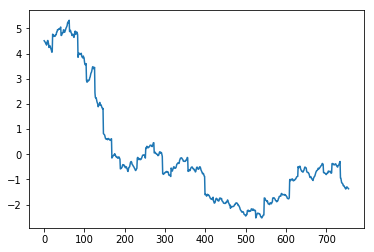

In [113]:
plt.plot(transformed_data[:,0])

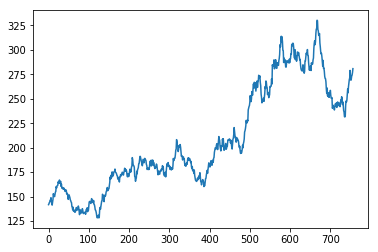

In [114]:
plt.plot(prices[:,0])

In [115]:
print('Explained variance by component: %s' % pca.explained_variance_ratio_)
pd.DataFrame(pca.components_,columns=load_object("C3_train.pkl")['features']['names'])

Explained variance by component: [4.61232798e-01 2.05085417e-01 1.30113937e-01 9.40185272e-02
 6.38771046e-02 2.24074504e-02 1.73487684e-02 5.87091904e-03
 4.01799593e-05 4.89878191e-06]


,labour cost,analyst projected total earnings,weighted average outstanding shares,R&D intensity index,relative strength index,total assets,net book value,analyst sentiment,market share,Aggregate Capital Cost
0,0.151073,0.452478,0.454332,-0.020157,-0.082581,0.401793,0.407006,-0.303210,0.236550,0.289506
1,0.471081,-0.023786,0.002639,-0.578496,0.075504,-0.310619,-0.294907,-0.013366,0.444065,0.237328
2,0.344411,-0.120821,-0.114824,0.307159,-0.481880,-0.151239,-0.155426,-0.291442,-0.376034,0.503659
3,-0.386607,0.034344,0.006713,-0.301594,-0.770974,-0.068090,-0.066351,-0.189746,0.202056,-0.279431
4,0.304097,0.105222,0.114932,0.245398,-0.383303,0.047493,0.050128,0.797542,0.182140,-0.045674
5,-0.610310,0.138250,0.114970,0.171526,0.082584,-0.230368,-0.224926,0.192885,0.237437,0.601421
6,-0.091675,0.247832,0.216207,-0.556612,-0.026721,-0.002551,-0.000905,0.293855,-0.682309,0.144897
7,-0.113488,-0.456354,-0.432987,-0.283113,-0.079497,0.413554,0.392545,0.165270,0.095855,0.378538
8,-0.030624,-0.688051,0.714276,-0.002591,-0.009768,-0.091738,0.081209,-0.000219,-0.017893,-0.005010
9,0.000351,-0.075122,0.097494,-0.003450,0.000577,0.692672,-0.710651,-0.000553,0.004045,-0.001984


In [116]:
# PCA Weighted Indices

In [178]:
pca_weighted = np.dot(z_data,pca.components_.T)

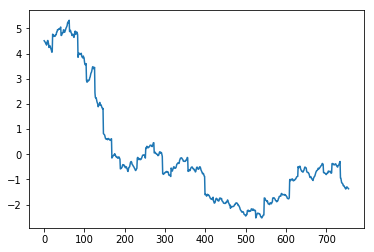

In [179]:
plt.plot(pca_weighted[:,0])

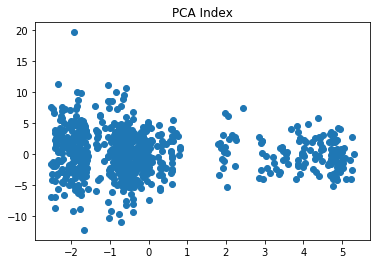

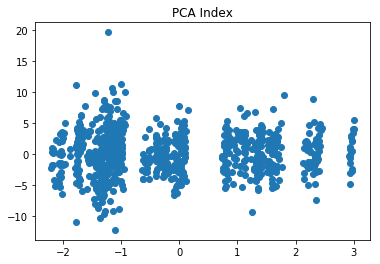

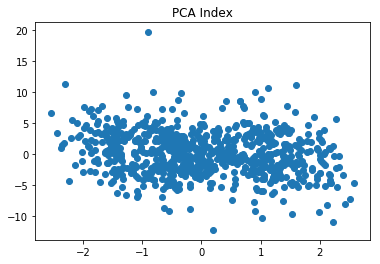

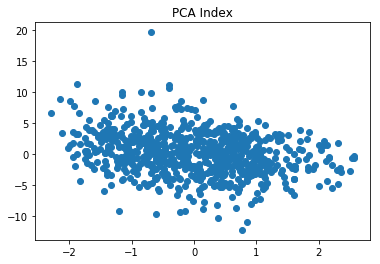

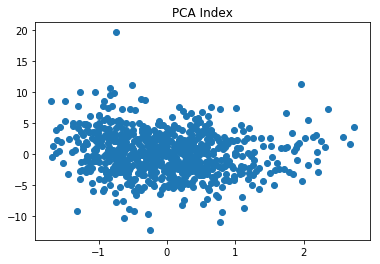

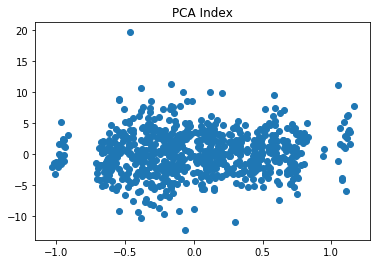

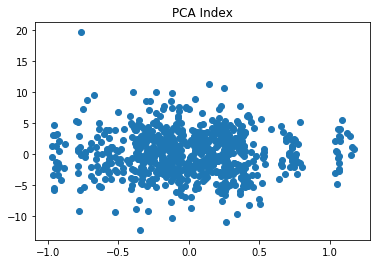

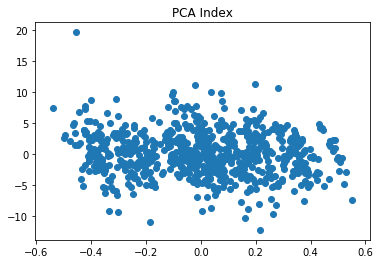

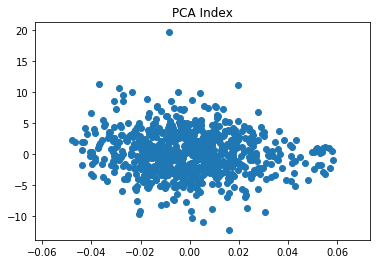

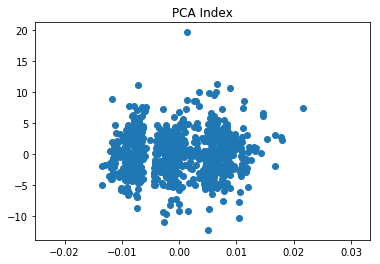

In [184]:
for i in range(10):
    plt.figure()
    plt.title("PCA Index")
    plt.scatter(pca_weighted[:,i],returns_0)

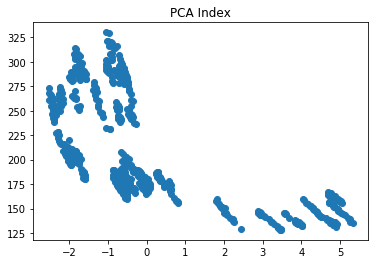

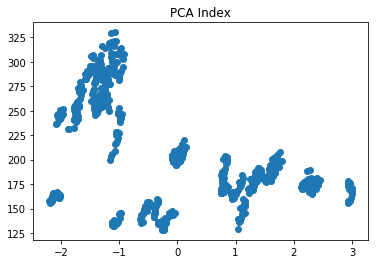

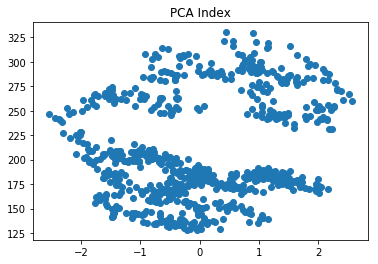

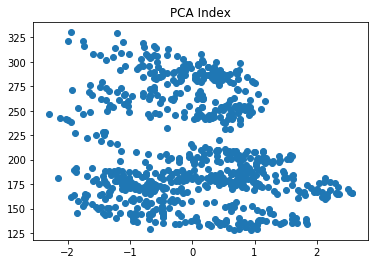

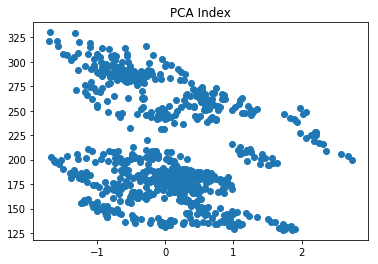

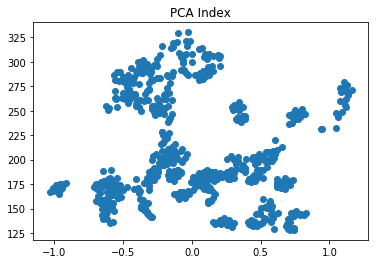

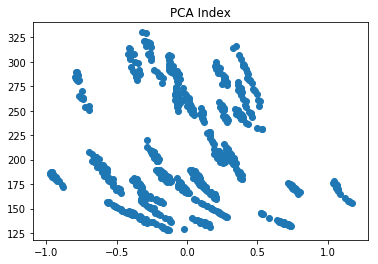

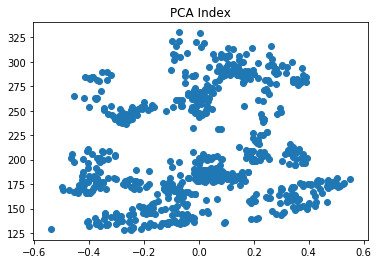

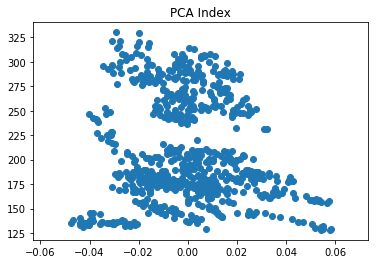

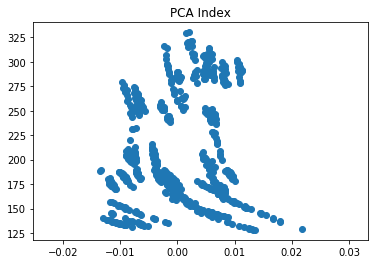

In [185]:
for i in range(10):
    plt.figure()
    plt.title("PCA Index")
    plt.scatter(pca_weighted[:,i],prices_0)

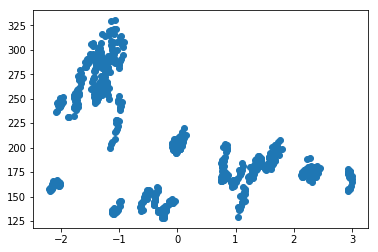

In [149]:
plt.scatter(pca_weighted[:,1],prices_0)

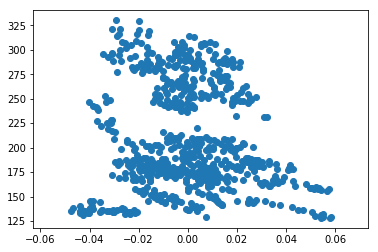

In [155]:
plt.scatter(pca_weighted[:,8],prices_0)

In [117]:
def creating_pca_indices(pca_components,data):
    

array([[ 1.51072962e-01,  4.52477516e-01,  4.54332344e-01,
        -2.01569730e-02, -8.25805692e-02,  4.01793109e-01,
         4.07006109e-01, -3.03210089e-01,  2.36549791e-01,
         2.89505592e-01],
       [ 4.71080980e-01, -2.37855224e-02,  2.63877388e-03,
        -5.78496345e-01,  7.55040323e-02, -3.10618992e-01,
        -2.94906806e-01, -1.33655684e-02,  4.44065092e-01,
         2.37327809e-01],
       [ 3.44410856e-01, -1.20821119e-01, -1.14824054e-01,
         3.07159047e-01, -4.81880259e-01, -1.51239233e-01,
        -1.55426159e-01, -2.91442310e-01, -3.76034046e-01,
         5.03659380e-01],
       [-3.86607356e-01,  3.43444080e-02,  6.71313695e-03,
        -3.01594452e-01, -7.70973811e-01, -6.80897049e-02,
        -6.63511058e-02, -1.89745650e-01,  2.02056308e-01,
        -2.79430629e-01],
       [ 3.04097374e-01,  1.05221708e-01,  1.14932053e-01,
         2.45397768e-01, -3.83302556e-01,  4.74931365e-02,
         5.01279083e-02,  7.97542011e-01,  1.82140396e-01,
        -4.